Projeto de Machin learning para detectar possíveis fraudes em cartões de crédito. 
Os dados foram manipulados para preservar a privacidade.

Data set disponível em: https://archive.ics.uci.edu/ml/datasets/credit+approval

## Parte 1. Exploratory Analisys

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)
sns.set_style('white')


In [336]:
#Importando os dados originais
dfMain = pd.read_csv('../dados/data.csv')
dfMain.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [337]:
#Dados para manipulação
df =pd.read_csv('../dados/data.csv')
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [338]:
#Conhecendo os valores da coluna target
df['+'].unique()

array(['+', '-'], dtype=object)

In [339]:
#Informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       689 non-null    object 
 1   30.83   689 non-null    object 
 2   0       689 non-null    float64
 3   u       689 non-null    object 
 4   g       689 non-null    object 
 5   w       689 non-null    object 
 6   v       689 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  01      689 non-null    int64  
 11  f       689 non-null    object 
 12  g.1     689 non-null    object 
 13  00202   689 non-null    object 
 14  0.1     689 non-null    int64  
 15  +       689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [340]:
#Valores nulos
df.isnull().sum()

b        0
30.83    0
0        0
u        0
g        0
w        0
v        0
1.25     0
t        0
t.1      0
01       0
f        0
g.1      0
00202    0
0.1      0
+        0
dtype: int64

In [341]:
df.isna().sum()

b        0
30.83    0
0        0
u        0
g        0
w        0
v        0
1.25     0
t        0
t.1      0
01       0
f        0
g.1      0
00202    0
0.1      0
+        0
dtype: int64

In [342]:
#Estatísticas
df.describe()

,0,1.25,01,0.1
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


Nota-se que a colunan 0.1 há uma variação muito alta.

In [343]:
#Variancia dos dados
df.var()

0       2.478517e+01
1.25    1.121405e+01
01      2.367971e+01
0.1     2.718312e+07
dtype: float64

In [344]:
#Correlação das colunas
df.corr()

,0,1.25,01,0.1
0,1.000000,0.298714,0.271003,0.122935
1.25,0.298714,1.000000,0.322247,0.051267
01,0.271003,0.322247,1.000000,0.063616
0.1,0.122935,0.051267,0.063616,1.000000


Todas as colunas plotadas abaixo, seguem uma assimetria a esquerda. 

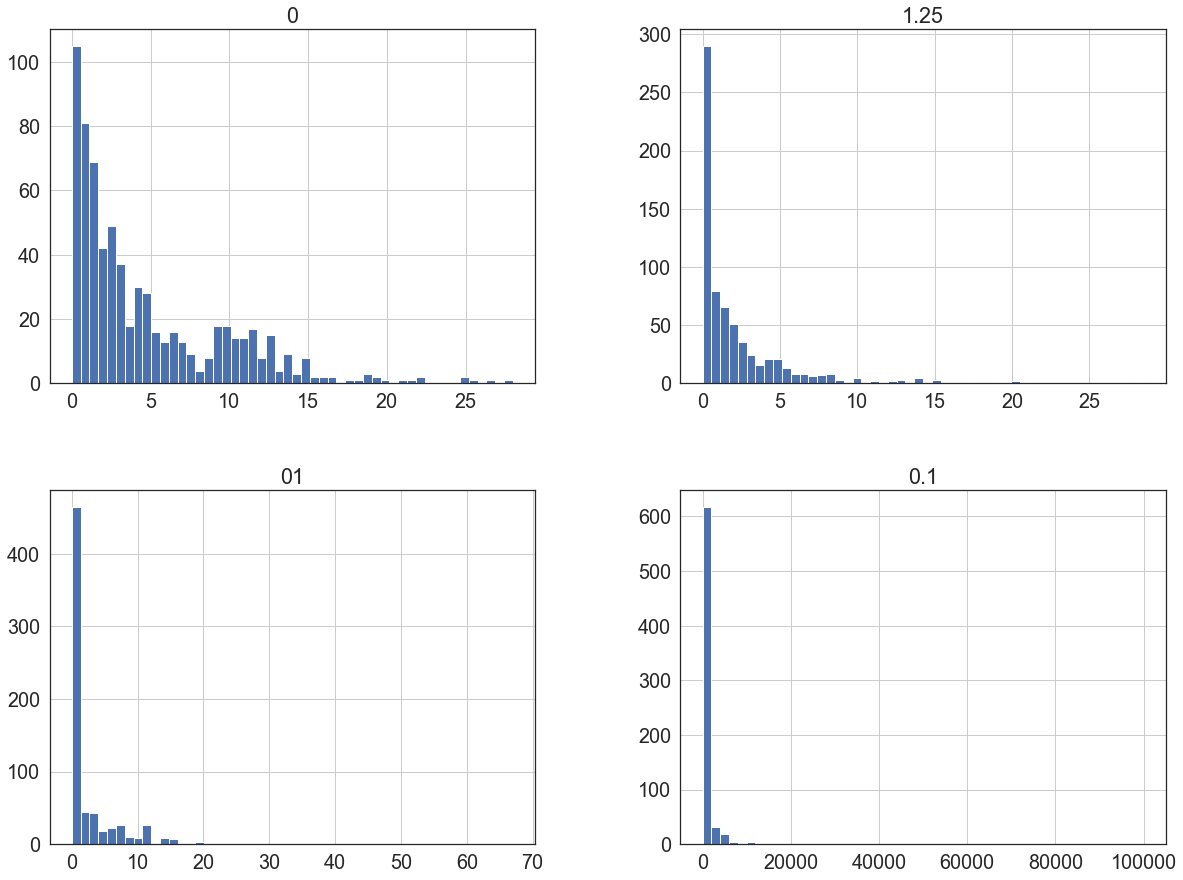

In [345]:
#Visualização em histogramas
df.hist(bins = 50, figsize=(20,15))
plt.show()

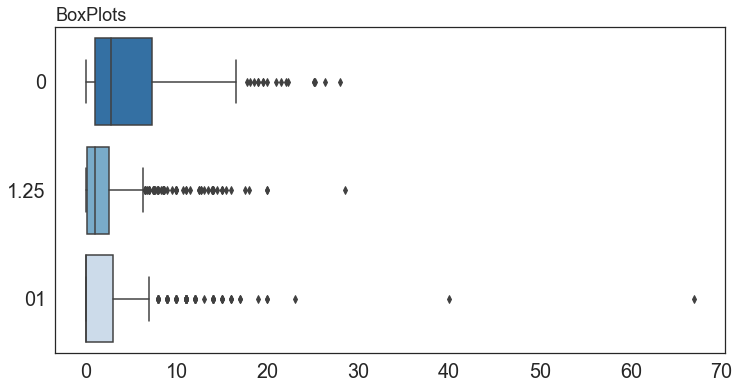

In [346]:
#Boxplots das colunas com menor variância
ax = sns.boxplot(data = df[["0","1.25", "01"]], orient='h', palette='Blues_r')
ax.figure.set_size_inches(12, 6)
ax.set_title("BoxPlots", fontsize = 18, loc='left')
plt.show()

Text(0.0, 1.0, 'Coluna 0.1')

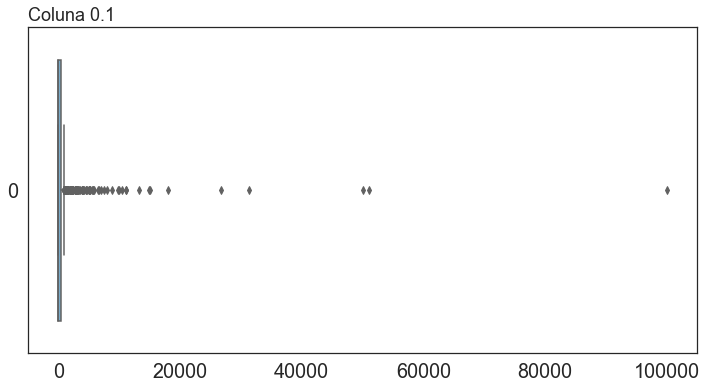

In [347]:
#boxplot da coluna 0.1

ax = sns.boxplot(data= df['0.1'], orient='h',palette='Blues_r')
ax.figure.set_size_inches(12, 6)
ax.set_title("Coluna 0.1", fontsize = 18, loc='left')


In [348]:
#Quartis da coluna 0.1
p25 = np.quantile(df['0.1'], 0.25)
p50 = np.quantile(df['0.1'], 0.50)
p75 = np.quantile(df['0.1'], 0.75)
print(p25,p50, p75)

0.0 5.0 396.0


In [349]:
#função para calcular percentis
def quartile(data, x,y,z):
  p25 = np.quantile(data, x)
  p50 = np.quantile(data,y)
  p75 = np.quantile(data,z)
  print(f'Q25 = {p25}, Q50= {p50}, Q75 = {p75}')


In [350]:
quartile(df['0.1'], 0.25,0.50,0.75)

Q25 = 0.0, Q50= 5.0, Q75 = 396.0


## 2. Pre Processing

In [351]:
#Aplicando transformação logarítimica para diminuir a variância e outliers
df['0.1_log'] = np.log(df['0.1']+1)

In [352]:
df['0.1_log']

0      6.329721
1      6.715383
2      1.386294
3      0.000000
4      0.000000
         ...   
684    0.000000
685    5.978886
686    0.693147
687    6.621406
688    0.000000
Name: 0.1_log, Length: 689, dtype: float64

In [353]:
df['0.1_log'].var()

10.168008443694433

In [354]:
df['0.1'].var()

27183117.621949535

Text(0.0, 1.0, 'Coluna 0.1 log')

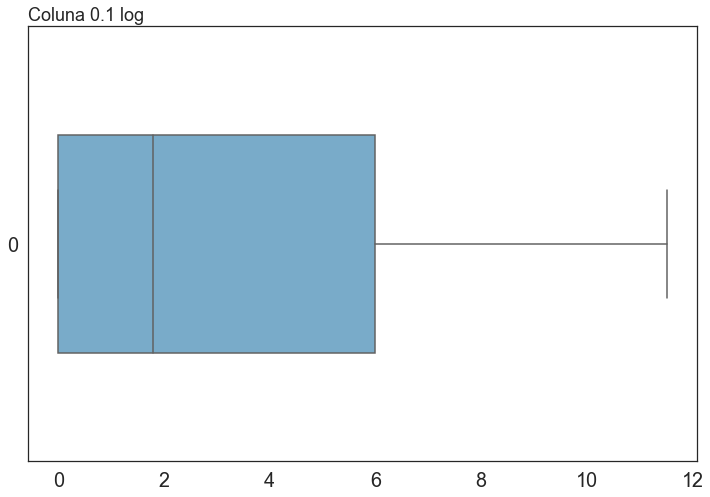

In [355]:
#Plotando o boxplot da coluna aplicado o log
ax = sns.boxplot(data = df['0.1_log'], orient='h', width =0.5, palette='Blues_r')
ax.figure.set_size_inches(12, 8)
ax.set_title("Coluna 0.1 log", fontsize=18, loc='left')


In [356]:
df['+'].unique

<bound method Series.unique of 0      +
1      +
2      +
3      +
4      +
      ..
684    -
685    -
686    -
687    -
688    -
Name: +, Length: 689, dtype: object>

In [357]:
df['+'].dtype

dtype('O')

In [358]:
#Substituindo valores + e -
df['+']= df['+'].replace({'+': 1, '-':0})

In [359]:
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+,0.1_log
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1,6.329721
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1,6.715383
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1,1.386294
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1,0.000000
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,1,0.000000


Text(0.0, 1.0, 'Balanceamento da target')

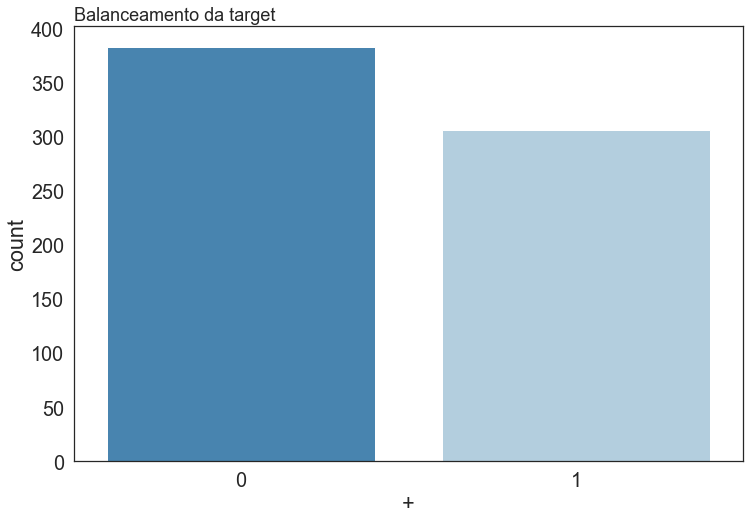

In [360]:
#Verificando balanceamento dos dados target

ax = sns.countplot(x=df['+'], palette='Blues_r')
ax.figure.set_size_inches(12, 8)
ax.set_title("Balanceamento da target",loc='left', fontsize=18)

In [361]:
#Verificando proporção dos dados 1 e 0
df['+'].value_counts()

0    383
1    306
Name: +, dtype: int64

In [362]:
#Dropando coluna original 0.1
df.drop(['0.1'], axis=1, inplace=True)

In [363]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer


In [364]:
#Separando em treino e teste
X=df.drop('+', axis=1)
y= df['+']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [365]:
X_train.shape, y_train.shape

((482, 15), (482,))

In [366]:
#Iterando e armazenando colunas cat e numéricas
variaveis_num = []
variaveis_cat = []
for col in X_train.columns:
  if X_train[col].dtype == 'object':
    variaveis_cat.append(col)
  else:
    variaveis_num.append(col)


In [367]:
variaveis_cat

['b', '30.83', 'u', 'g', 'w', 'v', 't', 't.1', 'f', 'g.1', '00202']

In [368]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 178 to 102
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   b        482 non-null    object 
 1   30.83    482 non-null    object 
 2   0        482 non-null    float64
 3   u        482 non-null    object 
 4   g        482 non-null    object 
 5   w        482 non-null    object 
 6   v        482 non-null    object 
 7   1.25     482 non-null    float64
 8   t        482 non-null    object 
 9   t.1      482 non-null    object 
 10  01       482 non-null    int64  
 11  f        482 non-null    object 
 12  g.1      482 non-null    object 
 13  00202    482 non-null    object 
 14  0.1_log  482 non-null    float64
dtypes: float64(3), int64(1), object(11)
memory usage: 60.2+ KB


In [369]:
#Tratamento colunas categóricas
pipeline_cat = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [370]:
#Pipeline para númericas
pipeline_num = Pipeline([
    ('scaler', StandardScaler())
])

In [371]:
#Aplicando column tranform
pre_processing = ColumnTransformer([
    ('num', pipeline_num, variaveis_num),
    ('cat', pipeline_cat, variaveis_cat)
])

## 4. Model

In [372]:
#Importando Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



In [373]:
#Criando modelo RandomForest
pipeline_random = make_pipeline(pre_processing, RandomForestClassifier(random_state=42))

#Treinando
pipeline_random.fit(X_train, y_train)




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['0', '1.25', '01',
                                                   '0.1_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['b', '30.83', 'u', 'g', 'w',
                                                   'v', 't', 't.1', 'f', 'g.1',
                                                   '00202'])])),
                ('randomforestclassifier'

In [374]:
#Modelo logistic regression
pipeline_logisticR = make_pipeline(pre_processing, LogisticRegression(random_state=42))

#Treinando 
pipeline_logisticR.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['0', '1.25', '01',
                                                   '0.1_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['b', '30.83', 'u', 'g', 'w',
                                                   'v', 't', 't.1', 'f', 'g.1',
                                                   '00202'])])),
                ('logisticregression', Lo

## 4. Evaluate Model

#### 4.1 Evaluating RandomForest

In [375]:
#Random Forest
pipeline_random.score(X_test, y_test)

0.8695652173913043

In [376]:
#Previsao
y_prevRandom = pipeline_random.predict(X_test)
y_prevRandom

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [377]:
#Importando bibliotecas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_prevRandom))



[[96 17]
 [10 84]]


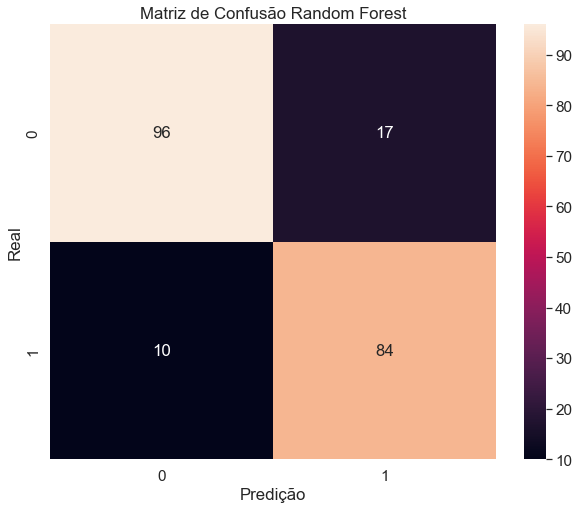

In [378]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix(y_test, y_prevRandom),annot = True, fmt="d" ).set(xlabel = "Predição", ylabel = "Real", title = "Matriz de Confusão Random Forest")
plt.show()

In [379]:
reportR = classification_report(y_test, y_prevRandom)
print(reportR)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       113
           1       0.83      0.89      0.86        94

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207



#### 4.2 Avaliando Regressão Logística

In [380]:
pipeline_logisticR.score(X_test, y_test)

0.8309178743961353

In [381]:
#Previsao
y_prevLog = pipeline_logisticR.predict(X_test)
y_prevLog

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [382]:
print(confusion_matrix(y_test, y_prevLog))

[[91 22]
 [13 81]]


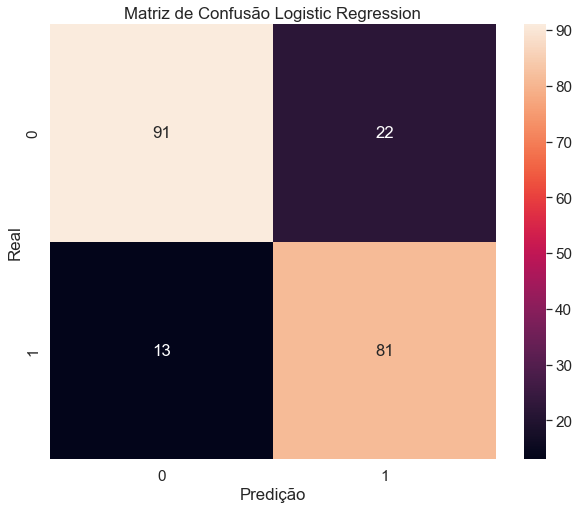

In [383]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10, 8))
sns.heatmap(confusion_matrix(y_test, y_prevLog),annot = True, fmt="d" ).set(xlabel = "Predição", ylabel = "Real", title = "Matriz de Confusão Logistic Regression")
plt.show()

In [384]:
reportL = classification_report(y_test, y_prevLog)
print(reportL)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       113
           1       0.79      0.86      0.82        94

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207



## 5. Cross Validate

#### 5.1 Cross Validate RandomForest()

In [385]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val

KFold(n_splits=5, random_state=42, shuffle=True)

In [386]:
cross_val_score(pipeline_random,X_train,y_train, cv = cross_val)

array([0.91752577, 0.88659794, 0.88541667, 0.83333333, 0.84375   ])

In [387]:
acuraci_random_cross = cross_val_score(pipeline_random,X_train,y_train, cv = cross_val).mean()
acuraci_random_cross

0.8733247422680412

In [388]:
stdR = cross_val_score(pipeline_random,X_train,y_train, cv = cross_val).std()
stdR

0.030822399868666688

#### 5.2 Cross Validate LogisticRegression

In [389]:
cross_val_score(pipeline_logisticR, X_train,y_train, cv = cross_val)

array([0.88659794, 0.88659794, 0.875     , 0.86458333, 0.84375   ])

In [390]:
acuraci_log_cross = cross_val_score(pipeline_logisticR, X_train,y_train, cv = cross_val).mean()
acuraci_log_cross

0.8713058419243985

In [391]:
std = cross_val_score(pipeline_logisticR, X,y, cv = cross_val).std()
std

0.020564448366210582

## 7. Conclusão



Após as análises das métricas, em geral, o modelo random forest teve um melhor desempenho. Vide documento do projeto em pdf.